# Regional plot

## load gwaslab

In [1]:
import gwaslab as gl

In [2]:
gl.show_version()

2024/12/23 12:43:27 GWASLab v3.5.4 https://cloufield.github.io/gwaslab/
2024/12/23 12:43:27 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com


## download sample data

In [3]:
#!wget -O t2d_bbj.txt.gz http://jenger.riken.jp/14/

## load sumstats into gwaslab.Sumstats

In [4]:
mysumstats = gl.Sumstats("../0_sample_data/t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             build="19",
             chrom_pat="7",
             n="N")
mysumstats.basic_check(verbose = False)

2024/12/23 12:43:27 GWASLab v3.5.4 https://cloufield.github.io/gwaslab/
2024/12/23 12:43:27 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
2024/12/23 12:43:27 Start to initialize gl.Sumstats from file :../0_sample_data/t2d_bbj.txt.gz
2024/12/23 12:43:27  -Columns used to filter variants: CHR
2024/12/23 12:43:27  -Loading only variants on chromosome with pattern : 7 ...
2024/12/23 12:43:41  -Loaded 707780 variants on chromosome with pattern :7 ...
2024/12/23 12:43:41  -Reading columns          : ALT,SE,POS,BETA,P,Dir,N,SNP,CHR,Frq,REF
2024/12/23 12:43:41  -Renaming columns to      : EA,SE,POS,BETA,P,DIRECTION,N,SNPID,CHR,EAF,NEA
2024/12/23 12:43:41  -Current Dataframe shape : 707780  x  11
2024/12/23 12:43:41  -Initiating a status column: STATUS ...
2024/12/23 12:43:41  -Genomic coordinates are based on GRCh37/hg19...
2024/12/23 12:43:41  -NEAF is specified...
2024/12/23 12:43:41  -Checking if 0<= NEAF <=1 ...
2024/12/23 12:43:41  -Converted NEAF to EAF.
2024/12/2

## Create Manhattan plot with sumstats on a single chromosome

2024/12/23 12:43:52 Start to create MQQ plot...v3.5.4:
2024/12/23 12:43:52  -Genomic coordinates version: 19...
2024/12/23 12:43:52  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 12:43:52  -Raw input contains 707780 variants...
2024/12/23 12:43:52  -MQQ plot layout mode is : m
2024/12/23 12:43:52 Finished loading specified columns from the sumstats.
2024/12/23 12:43:52 Start data conversion and sanity check:
2024/12/23 12:43:52  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 12:43:52  -Removed 0 variants with CHR <=0...
2024/12/23 12:43:52  -Removed 0 variants with nan in P column ...
2024/12/23 12:43:52  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2024/12/23 12:43:52  -Sumstats P values are being converted to -log10(P)...
2024/12/23 12:43:52  -Sanity check: 0 na/inf/-inf variants will be removed...
2024/12/23 12:43:52  -Converting data above cut line...
2024/12/23 12:43:52  -Maximum -log10(P) va

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f14e5b588b0>)

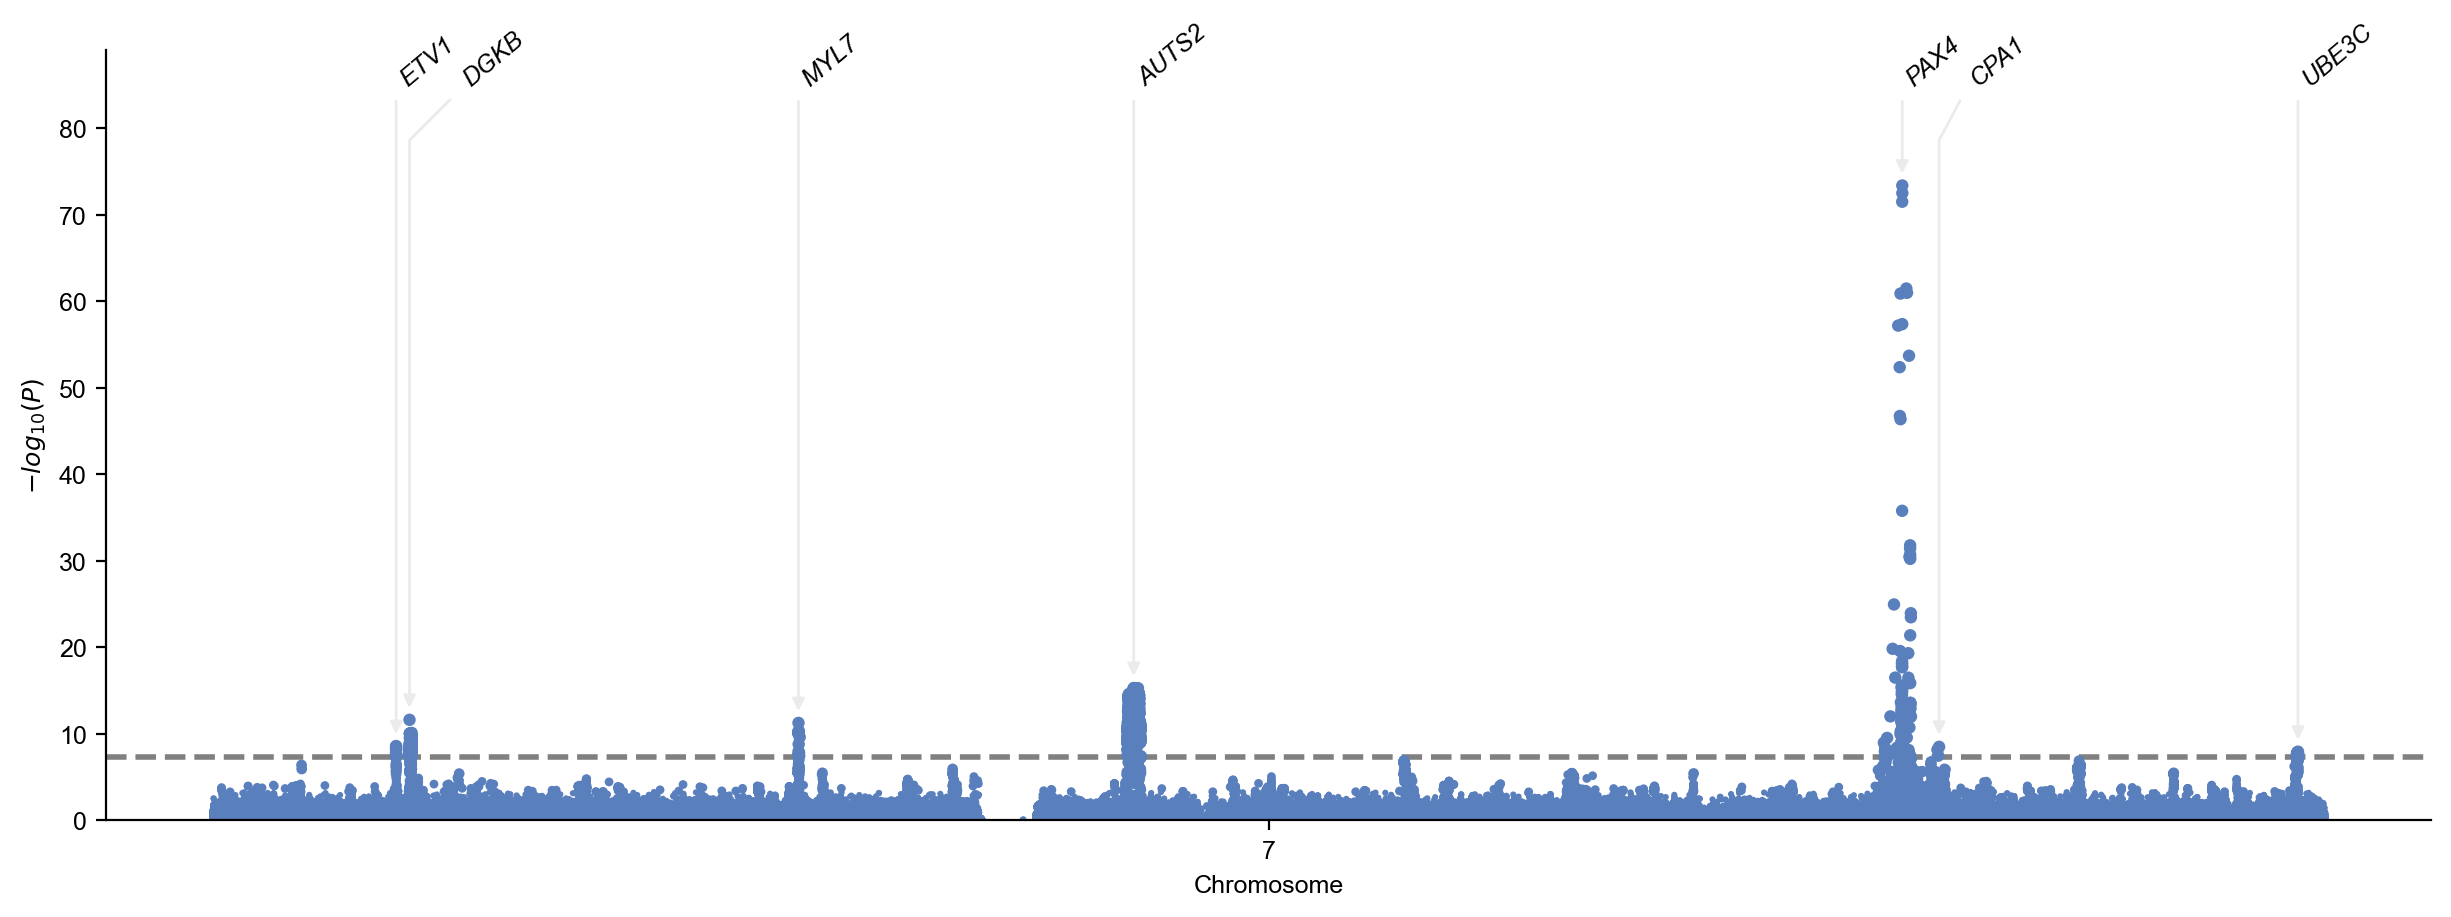

In [5]:
mysumstats.plot_mqq(mode="m",anno="GENENAME",anno_source="ensembl")

## Check lead variants

In [6]:
mysumstats.get_lead()

2024/12/23 12:43:58 Start to extract lead variants...v3.5.4
2024/12/23 12:43:58  -Current Dataframe shape : 707780 x 12 ; Memory usage: 75.40 MB
2024/12/23 12:43:58  -Processing 707780 variants...
2024/12/23 12:43:58  -Significance threshold : 5e-08
2024/12/23 12:43:58  -Sliding window size: 500  kb
2024/12/23 12:43:58  -Using P for extracting lead variants...
2024/12/23 12:43:58  -Found 1077 significant variants in total...
2024/12/23 12:43:58  -Identified 7 lead variants!
2024/12/23 12:43:58 Finished extracting lead variants.


SNPID  CHR        POS EA NEA     EAF    BETA      SE  \
77576    7:13888699_G_C    7   13888699  G   C  0.5680  0.0562  0.0094   
83154    7:14898282_C_T    7   14898282  C   T  0.6012  0.0617  0.0088   
229433   7:44174857_T_G    7   44174857  G   T  0.5985 -0.0640  0.0093   
335366   7:69406661_A_T    7   69406661  T   A  0.1981 -0.0900  0.0111   
568451  7:127253550_C_T    7  127253550  C   T  0.9081  0.2761  0.0152   
579917  7:130025713_G_A    7  130025713  G   A  0.9530 -0.1365  0.0230   
695434  7:157038803_A_G    7  157038803  G   A  0.4626 -0.0502  0.0088   

                   P       N DIRECTION   STATUS  
77576   2.507000e-09  191764      ++++  1960099  
83154   2.336000e-12  191764      ++++  1960099  
229433  5.325000e-12  191764      ----  1960099  
335366  4.871000e-16  191764      ----  1960099  
568451  4.101000e-74  191764      ++++  1960099  
579917  3.068000e-09  191764      ----  1960099  
695434  1.127000e-08  191764      ----  1960099

## Create a regional plot with no additional information

2024/12/23 12:43:58 Start to create MQQ plot...v3.5.4:
2024/12/23 12:43:58  -Genomic coordinates version: 19...
2024/12/23 12:43:58  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 12:43:58  -Raw input contains 707780 variants...
2024/12/23 12:43:58  -MQQ plot layout mode is : mqq
2024/12/23 12:43:58  -Region to plot : chr7:156538803-157538803.
2024/12/23 12:43:58  -Extract SNPs in region : chr7:156538803-157538803...
2024/12/23 12:43:58  -Extract SNPs in specified regions: 5831
2024/12/23 12:43:58 Finished loading specified columns from the sumstats.
2024/12/23 12:43:58 Start data conversion and sanity check:
2024/12/23 12:43:58  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 12:43:58  -Removed 0 variants with CHR <=0...
2024/12/23 12:43:58  -Removed 0 variants with nan in P column ...
2024/12/23 12:43:58  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2024/12/23 12:43:58  -Sumstats P values are bein

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f14e5b588b0>)

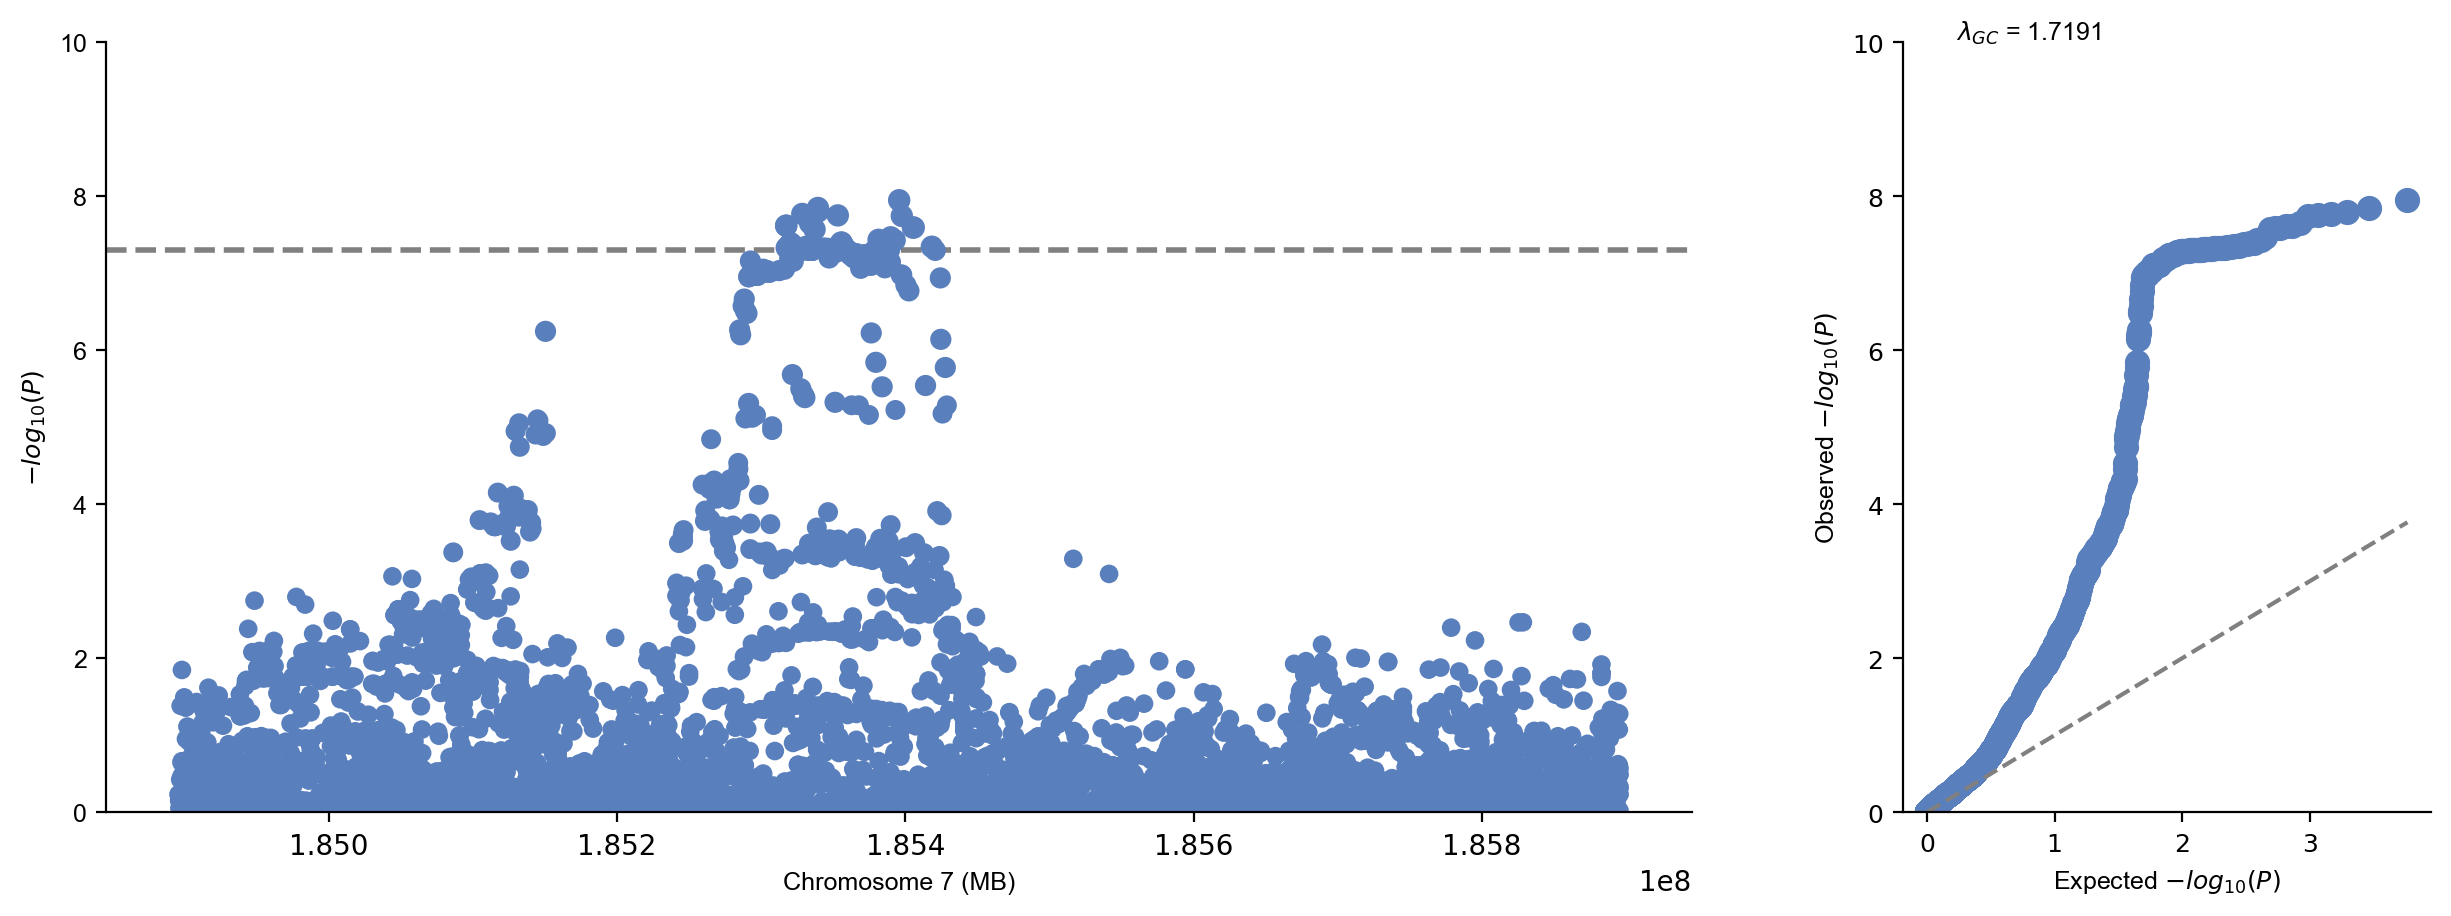

In [7]:
mysumstats.plot_mqq(region=(7,156538803,157538803))

## Create a regional plot with gene track

2024/12/23 12:43:59 Start to create MQQ plot...v3.5.4:
2024/12/23 12:43:59  -Genomic coordinates version: 19...
2024/12/23 12:43:59  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 12:43:59  -Raw input contains 707780 variants...
2024/12/23 12:43:59  -MQQ plot layout mode is : r
2024/12/23 12:43:59  -Region to plot : chr7:156538803-157538803.
2024/12/23 12:43:59  -Extract SNPs in region : chr7:156538803-157538803...
2024/12/23 12:43:59  -Extract SNPs in specified regions: 5831
2024/12/23 12:43:59 Finished loading specified columns from the sumstats.
2024/12/23 12:43:59 Start data conversion and sanity check:
2024/12/23 12:43:59  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 12:43:59  -Removed 0 variants with CHR <=0...
2024/12/23 12:43:59  -Removed 0 variants with nan in P column ...
2024/12/23 12:43:59  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2024/12/23 12:43:59  -Sumstats P values are being 

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2024/12/23 12:44:23  -plotting gene track..
2024/12/23 12:44:23  -plotting genes: 9..
2024/12/23 12:44:23  -plotting exons: 391..
2024/12/23 12:44:23  -Finished plotting gene track..
2024/12/23 12:44:23 Finished creating MQQ plot successfully!
2024/12/23 12:44:23 Start to extract variants for annotation...
2024/12/23 12:44:23  -Found 1 significant variants with a sliding window size of 500 kb...
2024/12/23 12:44:23 Finished extracting variants for annotation...
2024/12/23 12:44:23 Start to process figure arts.
2024/12/23 12:44:23  -Processing X labels...
2024/12/23 12:44:23  -Processing Y labels...
2024/12/23 12:44:23  -Processing Y tick lables...
2024/12/23 12:44:23  -Processing Y labels...
2024/12/23 12:44:23  -Processing lines...
2024/12/23 12:44:23 Finished processing figure arts.
2024/12/23 12:44:23 Start to annotate variants...
2024/12/23 12:44:23  -Skip annotating
2024/12/23 12:44:23 Finished annotating variants.
2024/12/23 12:44:23 Start to save figure...
2024/12/23 12:44:23  -

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.g_Log.Log at 0x7f14e5b588b0>)

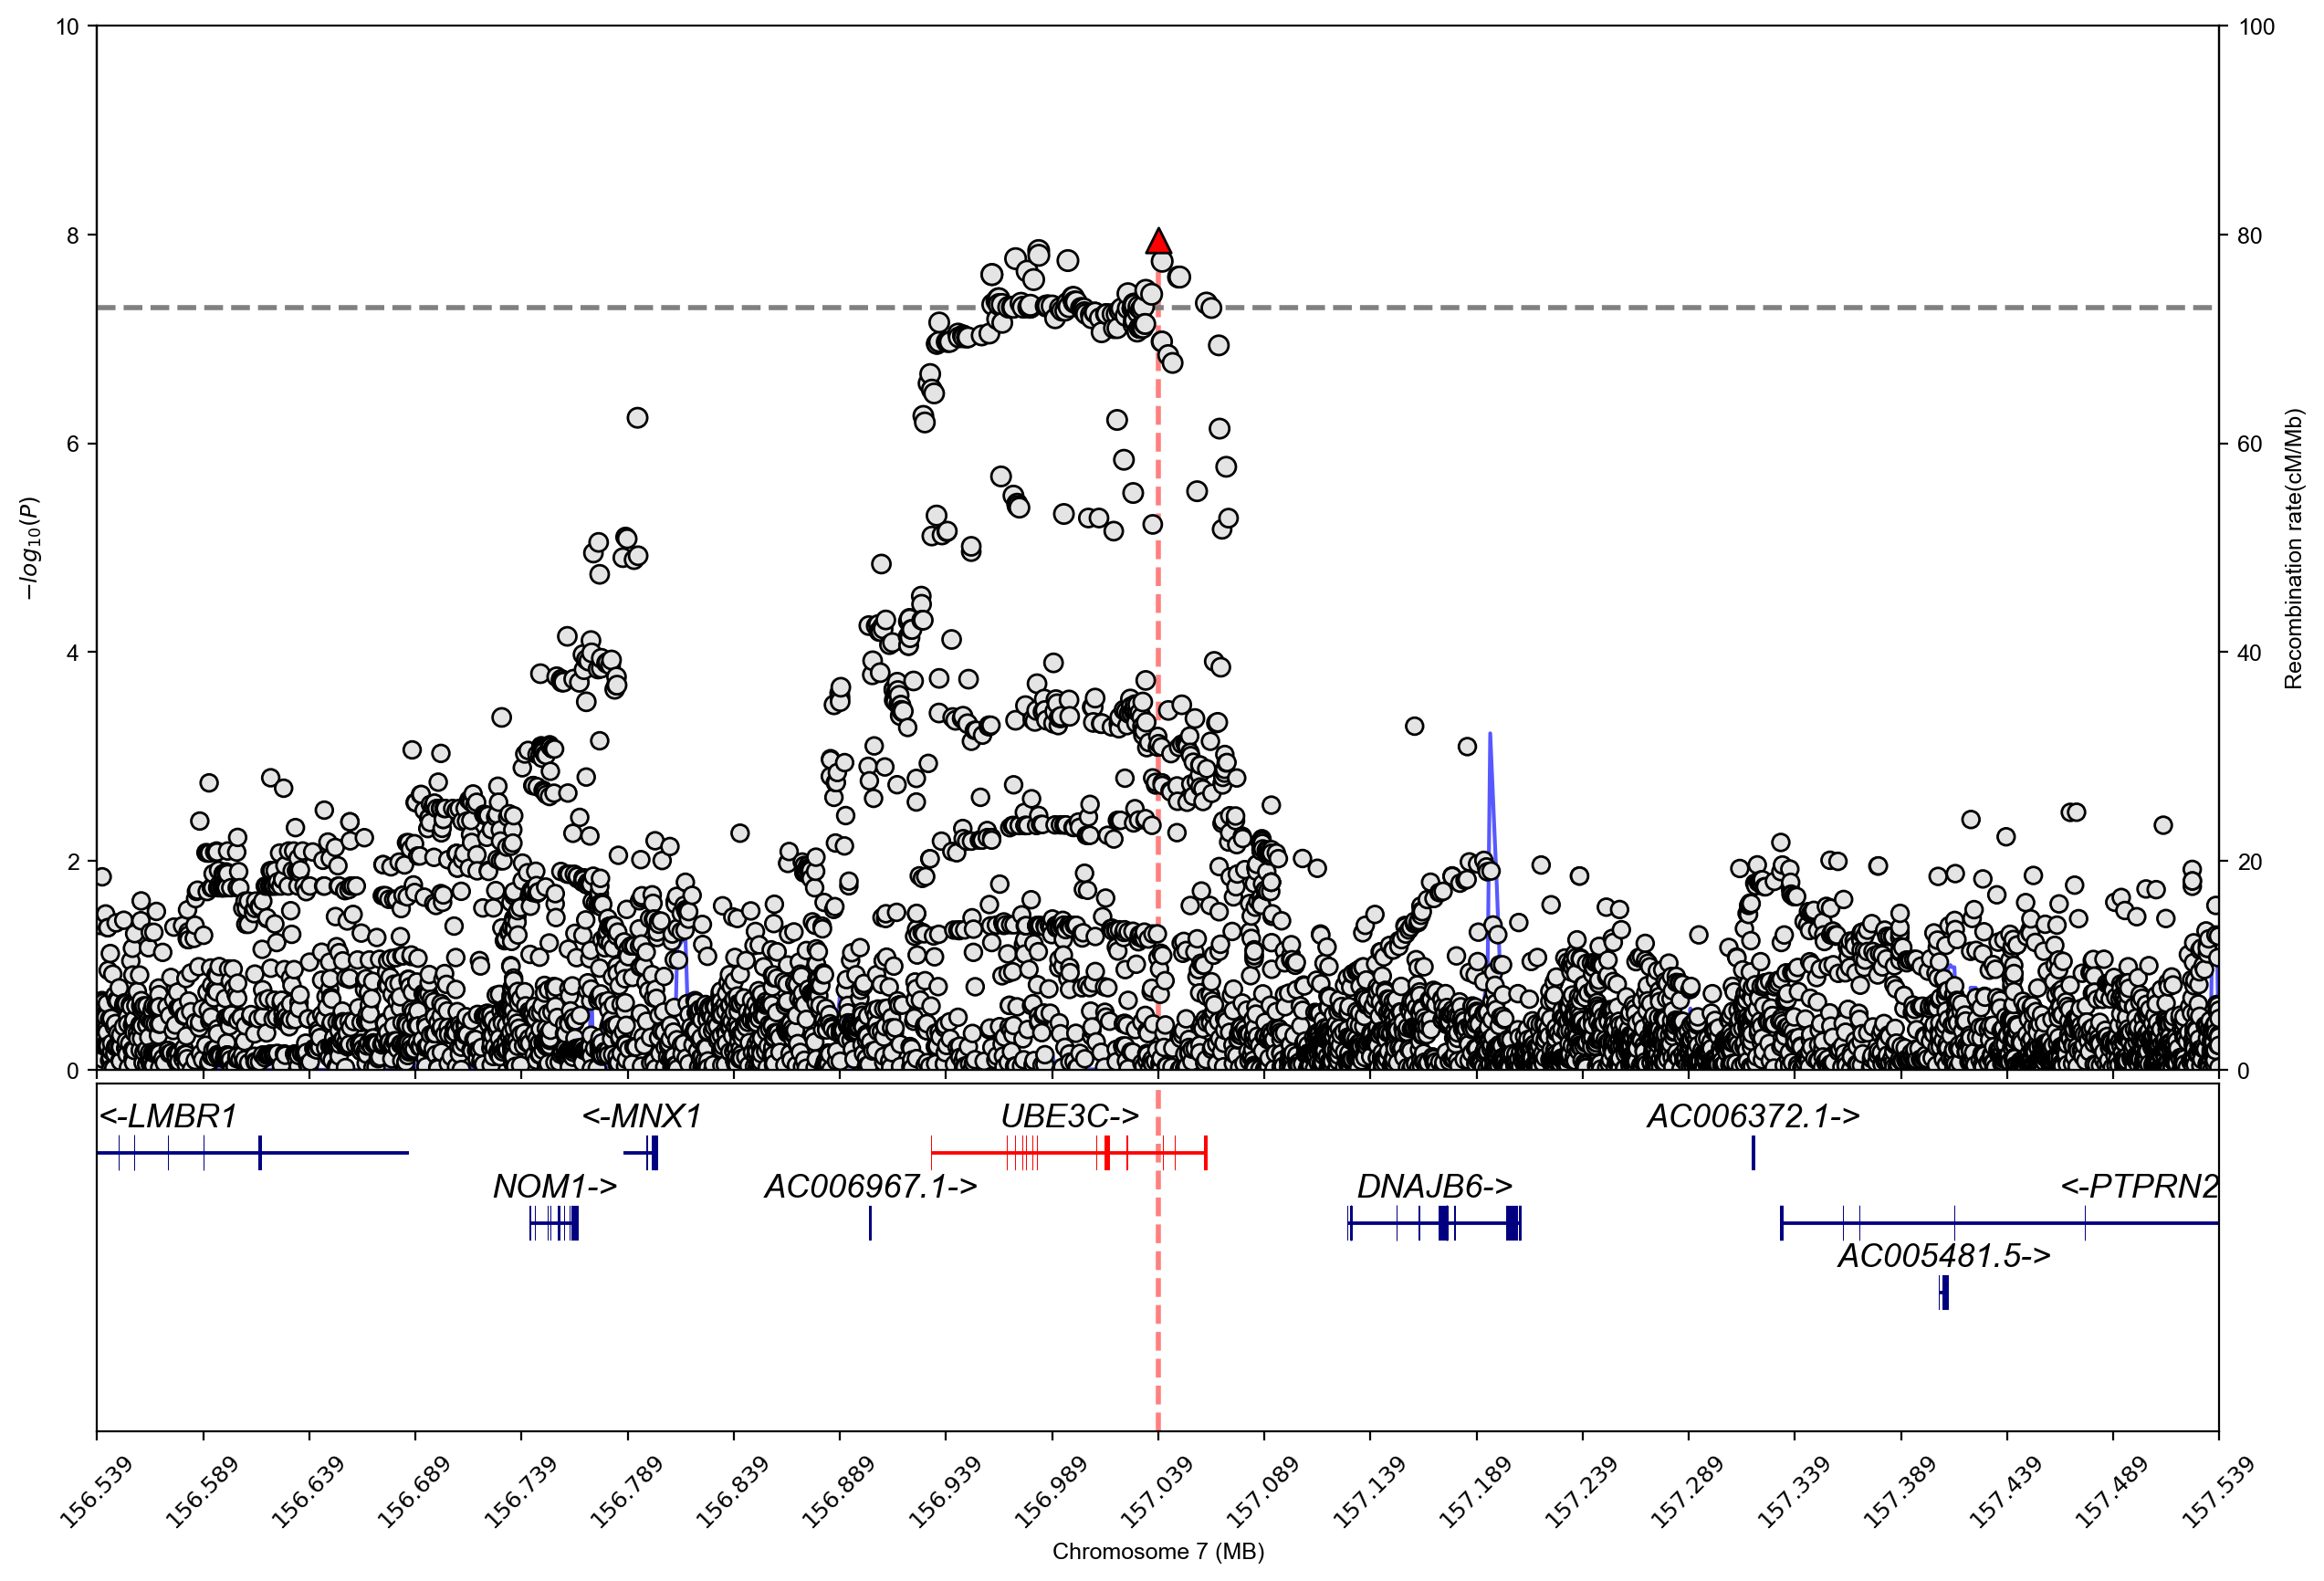

In [8]:
mysumstats.plot_mqq(mode="r",region=(7,156538803,157538803))

## Create regional plot with gene track and LD information

2024/12/23 12:44:24 Start to create MQQ plot...v3.5.4:
2024/12/23 12:44:24  -Genomic coordinates version: 19...
2024/12/23 12:44:24  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 12:44:24  -Raw input contains 707780 variants...
2024/12/23 12:44:24  -MQQ plot layout mode is : r
2024/12/23 12:44:24  -Region to plot : chr7:156538803-157538803.
2024/12/23 12:44:24  -Checking chromosome notations in VCF/BCF files...
2024/12/23 12:44:24  -Checking prefix for chromosomes in VCF/BCF files...
2024/12/23 12:44:24  -No prefix for chromosomes in the VCF/BCF files.
2024/12/23 12:44:24  -Extract SNPs in region : chr7:156538803-157538803...
2024/12/23 12:44:24  -Extract SNPs in specified regions: 5831
2024/12/23 12:44:24 Finished loading specified columns from the sumstats.
2024/12/23 12:44:24 Start data conversion and sanity check:
2024/12/23 12:44:24  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 12:44:24  -Removed 0 variants with CHR <=0...
2024/12/23 12

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2024/12/23 12:44:49  -plotting gene track..
2024/12/23 12:44:49  -plotting genes: 9..
2024/12/23 12:44:49  -plotting exons: 391..
2024/12/23 12:44:49  -Finished plotting gene track..
2024/12/23 12:44:50 Finished creating MQQ plot successfully!
2024/12/23 12:44:50 Start to extract variants for annotation...
2024/12/23 12:44:50  -Found 1 significant variants with a sliding window size of 500 kb...
2024/12/23 12:44:50 Finished extracting variants for annotation...
2024/12/23 12:44:50 Start to process figure arts.
2024/12/23 12:44:50  -Processing X labels...
2024/12/23 12:44:50  -Processing Y labels...
2024/12/23 12:44:50  -Processing Y tick lables...
2024/12/23 12:44:50  -Processing Y labels...
2024/12/23 12:44:50  -Processing color bar...
2024/12/23 12:44:50  -Processing lines...
2024/12/23 12:44:50 Finished processing figure arts.
2024/12/23 12:44:50 Start to annotate variants...
2024/12/23 12:44:50  -Skip annotating
2024/12/23 12:44:50 Finished annotating variants.
2024/12/23 12:44:50 

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7f14e5b588b0>)

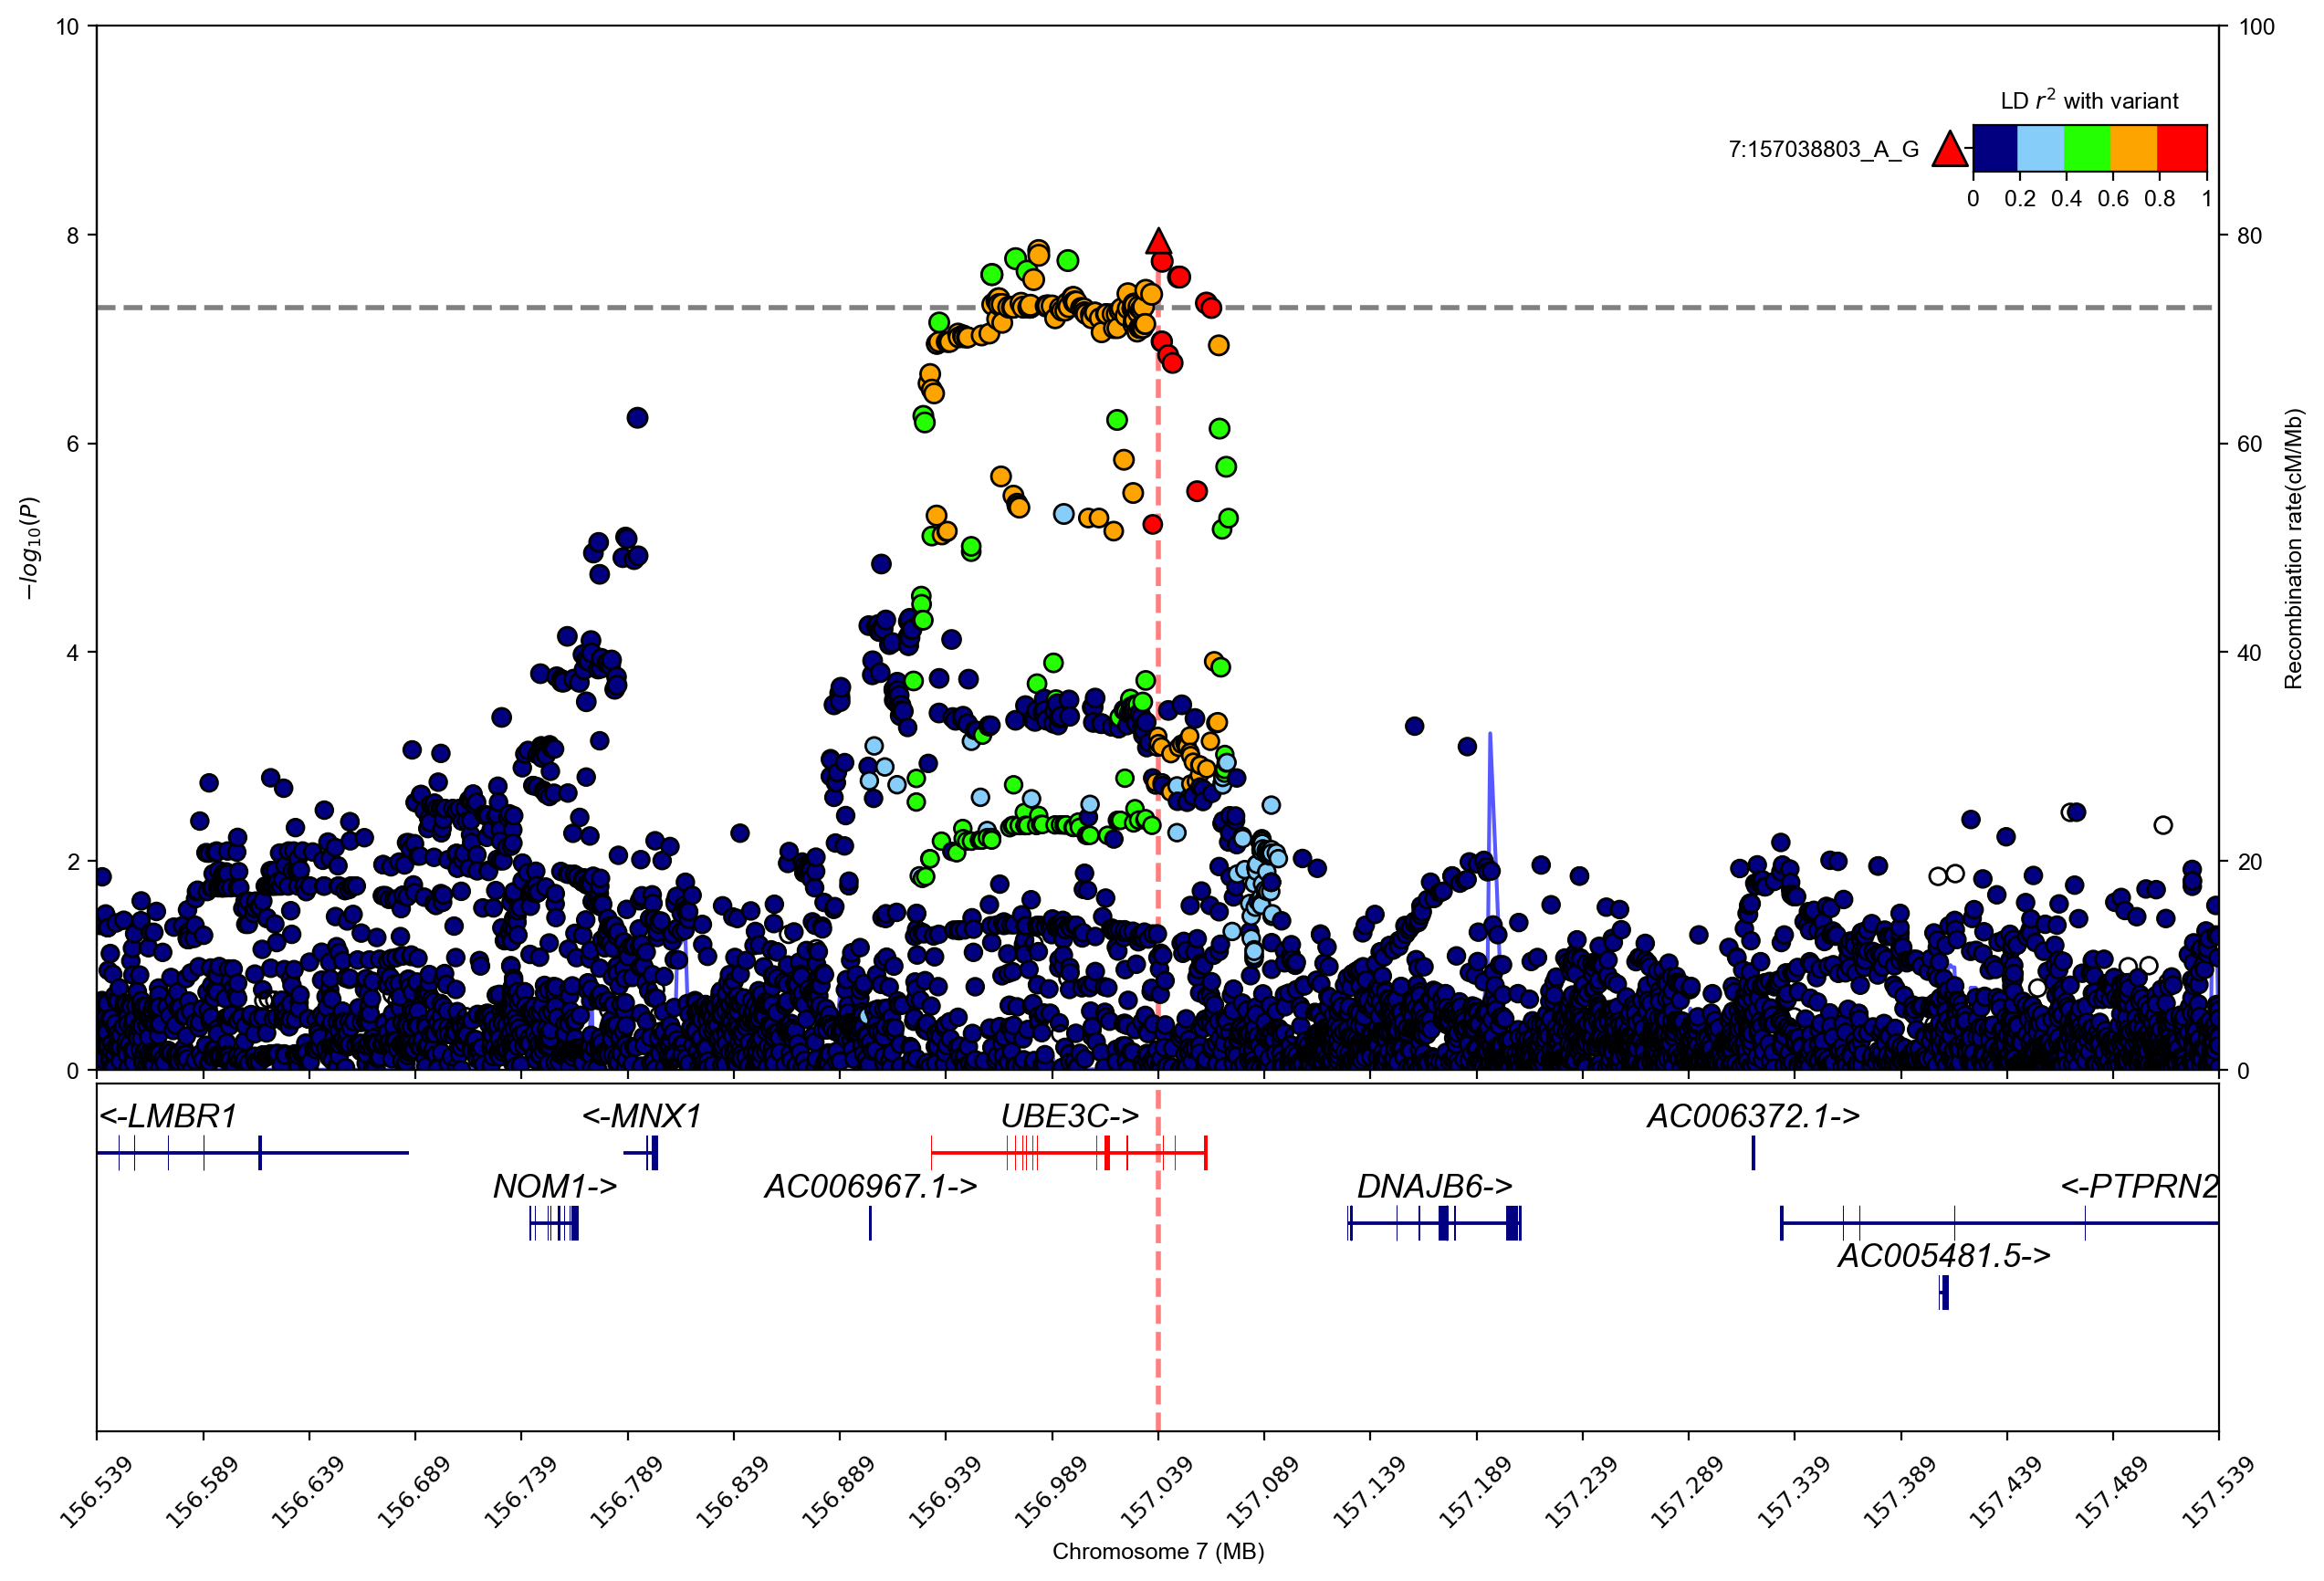

In [9]:
mysumstats.plot_mqq(mode="r",
                    region=(7,156538803,157538803),                    
                    vcf_path=gl.get_path("1kg_eas_hg19")
                   )

## Create regional plot with two reference variants

In [10]:
mysumstats.filter_flanking_by_chrpos([(7,156738803)],windowsizekb=100).get_lead(sig_level=1e-5)

2024/12/23 12:44:50 Start to extract variants in the flanking regions using CHR and POS...
2024/12/23 12:44:50  - Central positions: [(7, 156738803)]
2024/12/23 12:44:50  - Flanking windowsize in kb: 100
2024/12/23 12:44:50  - Variants in flanking region 7:156638803-156838803 : 1119
2024/12/23 12:44:50  - Extracted 1119 variants in the regions.
2024/12/23 12:44:50 Finished extracting variants in the flanking regions.
2024/12/23 12:44:50 Start to extract lead variants...v3.5.4
2024/12/23 12:44:50  -Current Dataframe shape : 1119 x 12 ; Memory usage: 22.16 MB
2024/12/23 12:44:50  -Processing 1119 variants...
2024/12/23 12:44:50  -Significance threshold : 1e-05
2024/12/23 12:44:50  -Sliding window size: 500  kb
2024/12/23 12:44:50  -Using P for extracting lead variants...
2024/12/23 12:44:50  -Found 4 significant variants in total...
2024/12/23 12:44:50  -Identified 1 lead variants!
2024/12/23 12:44:50 Finished extracting lead variants.


SNPID  CHR        POS  EA NEA     EAF    BETA      SE  \
694190  7:156793450_G_GA    7  156793450  GA   G  0.1168  0.0838  0.0167   

                   P       N DIRECTION   STATUS  
694190  5.686000e-07  191764      ++++  1960399

2024/12/23 12:44:50 Start to create MQQ plot...v3.5.4:
2024/12/23 12:44:50  -Genomic coordinates version: 19...
2024/12/23 12:44:50  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 12:44:50  -Raw input contains 707780 variants...
2024/12/23 12:44:50  -MQQ plot layout mode is : r
2024/12/23 12:44:50  -Region to plot : chr7:156538803-157538803.
2024/12/23 12:44:50  -Checking chromosome notations in VCF/BCF files...
2024/12/23 12:44:51  -Checking prefix for chromosomes in VCF/BCF files...
2024/12/23 12:44:51  -No prefix for chromosomes in the VCF/BCF files.
2024/12/23 12:44:51  -Extract SNPs in region : chr7:156538803-157538803...
2024/12/23 12:44:51  -Extract SNPs in specified regions: 5831
2024/12/23 12:44:51 Finished loading specified columns from the sumstats.
2024/12/23 12:44:51 Start data conversion and sanity check:
2024/12/23 12:44:51  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 12:44:51  -Removed 0 variants with CHR <=0...
2024/12/23 12

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2024/12/23 12:45:16  -plotting gene track..
2024/12/23 12:45:16  -plotting genes: 9..
2024/12/23 12:45:16  -plotting exons: 391..
2024/12/23 12:45:17  -Finished plotting gene track..
2024/12/23 12:45:17 Finished creating MQQ plot successfully!
2024/12/23 12:45:17 Start to extract variants for annotation...
2024/12/23 12:45:17  -Found 2 specified variants to annotate...
2024/12/23 12:45:17 Finished extracting variants for annotation...
2024/12/23 12:45:17 Start to process figure arts.
2024/12/23 12:45:17  -Processing X labels...
2024/12/23 12:45:17  -Processing Y labels...
2024/12/23 12:45:17  -Processing Y tick lables...
2024/12/23 12:45:17  -Processing Y labels...
2024/12/23 12:45:17  -Processing color bar...
2024/12/23 12:45:17  -Processing lines...
2024/12/23 12:45:17 Finished processing figure arts.
2024/12/23 12:45:17 Start to annotate variants...
2024/12/23 12:45:17  -Annotating using column CHR:POS...
2024/12/23 12:45:17  -Adjusting text positions with repel_force=0.03...
2024/1

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7f14e5b588b0>)

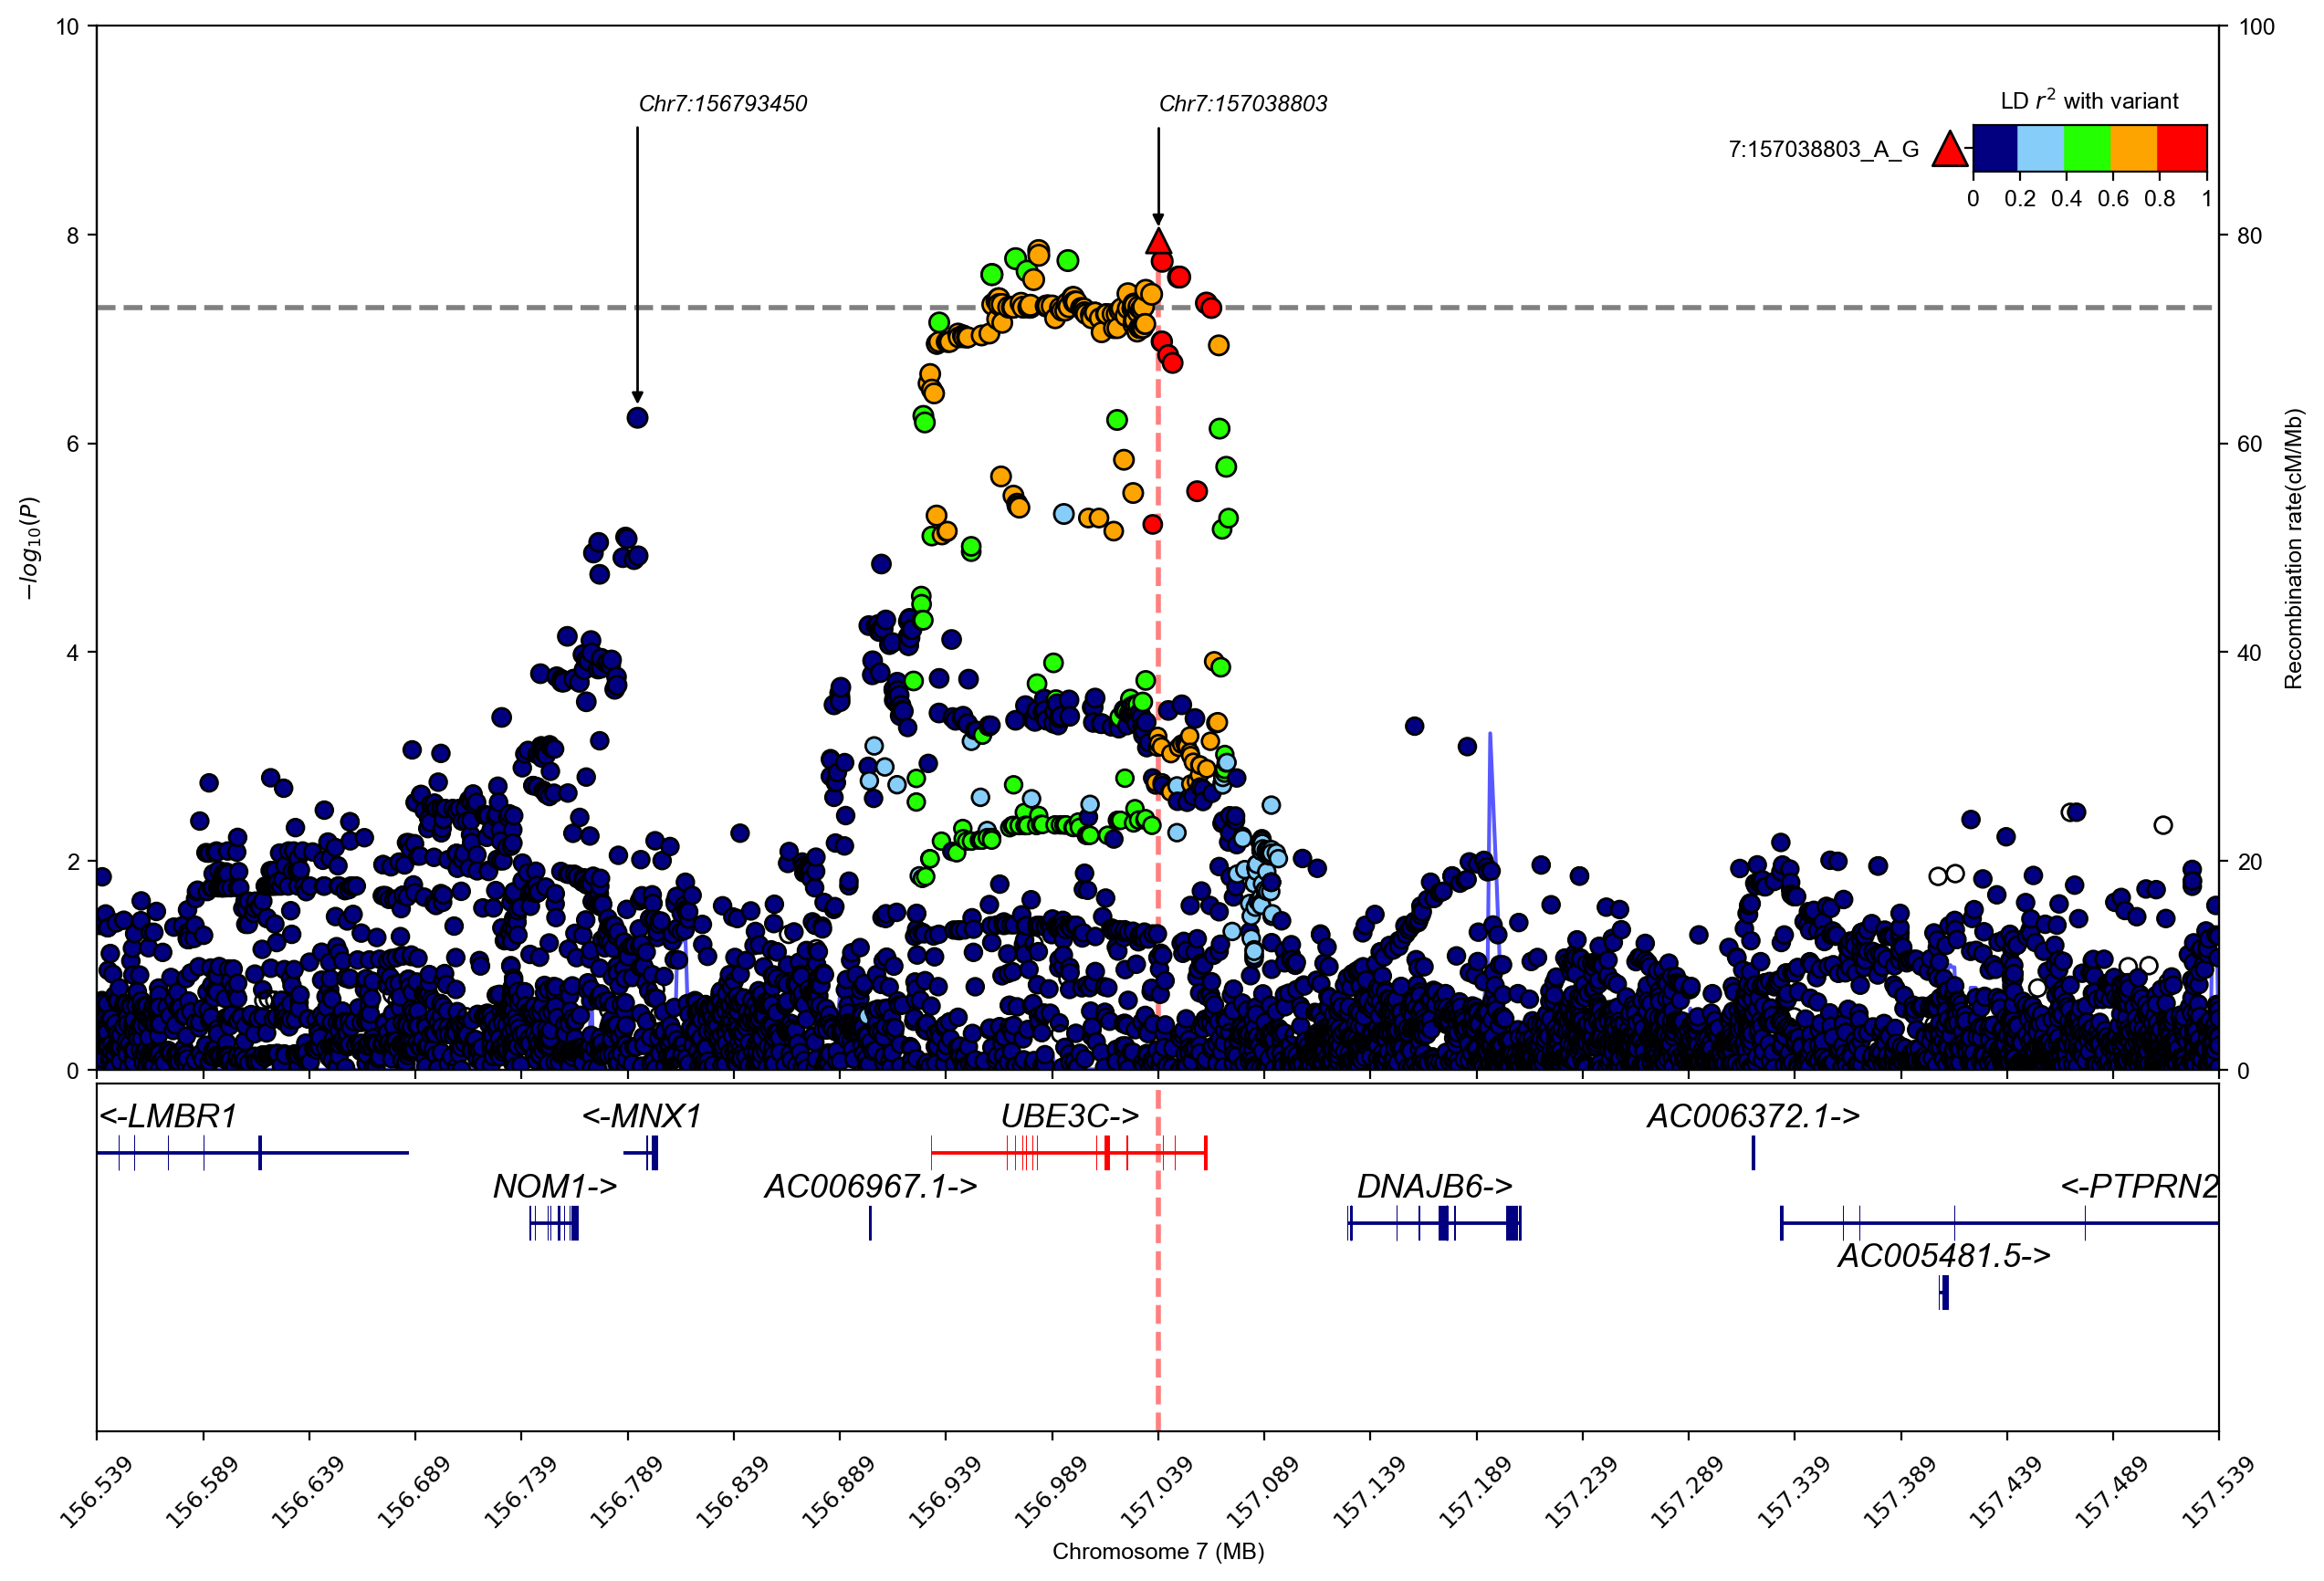

In [11]:
mysumstats.plot_mqq(mode="r",
                    region=(7,156538803,157538803),      
                    region_ref2 = "7:156793450_G_GA", 
                    vcf_path=gl.get_path("1kg_eas_hg19"),
                    anno=True,
                    anno_set=["7:156793450_G_GA","7:157038803_A_G"],
                    anno_args={"rotation":0}
                   )

## Create stacked regional plot

2024/12/23 12:45:17 Start to create stacked mqq plot by iteratively calling plot_mqq:
2024/12/23 12:45:17 Start to create MQQ plot...v3.5.4:
2024/12/23 12:45:17  -Genomic coordinates version: 19...
2024/12/23 12:45:17  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 12:45:17  -Raw input contains 707780 variants...
2024/12/23 12:45:17  -MQQ plot layout mode is : r
2024/12/23 12:45:17  -Region to plot : chr7:156538803-157538803.
2024/12/23 12:45:17  -Checking chromosome notations in VCF/BCF files...
2024/12/23 12:45:18  -Checking prefix for chromosomes in VCF/BCF files...
2024/12/23 12:45:18  -No prefix for chromosomes in the VCF/BCF files.
2024/12/23 12:45:18  -Extract SNPs in region : chr7:156538803-157538803...
2024/12/23 12:45:18  -Extract SNPs in specified regions: 5831
2024/12/23 12:45:18 Finished loading specified columns from the sumstats.
2024/12/23 12:45:18 Start data conversion and sanity check:
2024/12/23 12:45:18  -Sanity check will be skipped.
2024/12

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2024/12/23 12:45:44  -plotting gene track..
2024/12/23 12:45:44  -plotting genes: 9..
2024/12/23 12:45:44  -plotting exons: 391..
2024/12/23 12:45:44  -Finished plotting gene track..
2024/12/23 12:45:45 Finished creating MQQ plot successfully!
2024/12/23 12:45:45 Start to extract variants for annotation...
2024/12/23 12:45:45  -Found 2 specified variants to annotate...
2024/12/23 12:45:45 Finished extracting variants for annotation...
2024/12/23 12:45:45 Start to process figure arts.
2024/12/23 12:45:45  -Processing X labels...
2024/12/23 12:45:45  -Processing Y labels...
2024/12/23 12:45:45  -Processing Y tick lables...
2024/12/23 12:45:45  -Processing Y labels...
2024/12/23 12:45:45  -Processing color bar...
2024/12/23 12:45:45  -Processing lines...
2024/12/23 12:45:45 Finished processing figure arts.
2024/12/23 12:45:45 Start to annotate variants...
2024/12/23 12:45:45  -Annotating using column CHR:POS...
2024/12/23 12:45:45  -Adjusting text positions with repel_force=0.03...
2024/1

(<Figure size 3200x2400 with 6 Axes>, <gwaslab.g_Log.Log at 0x7f14e1087400>)

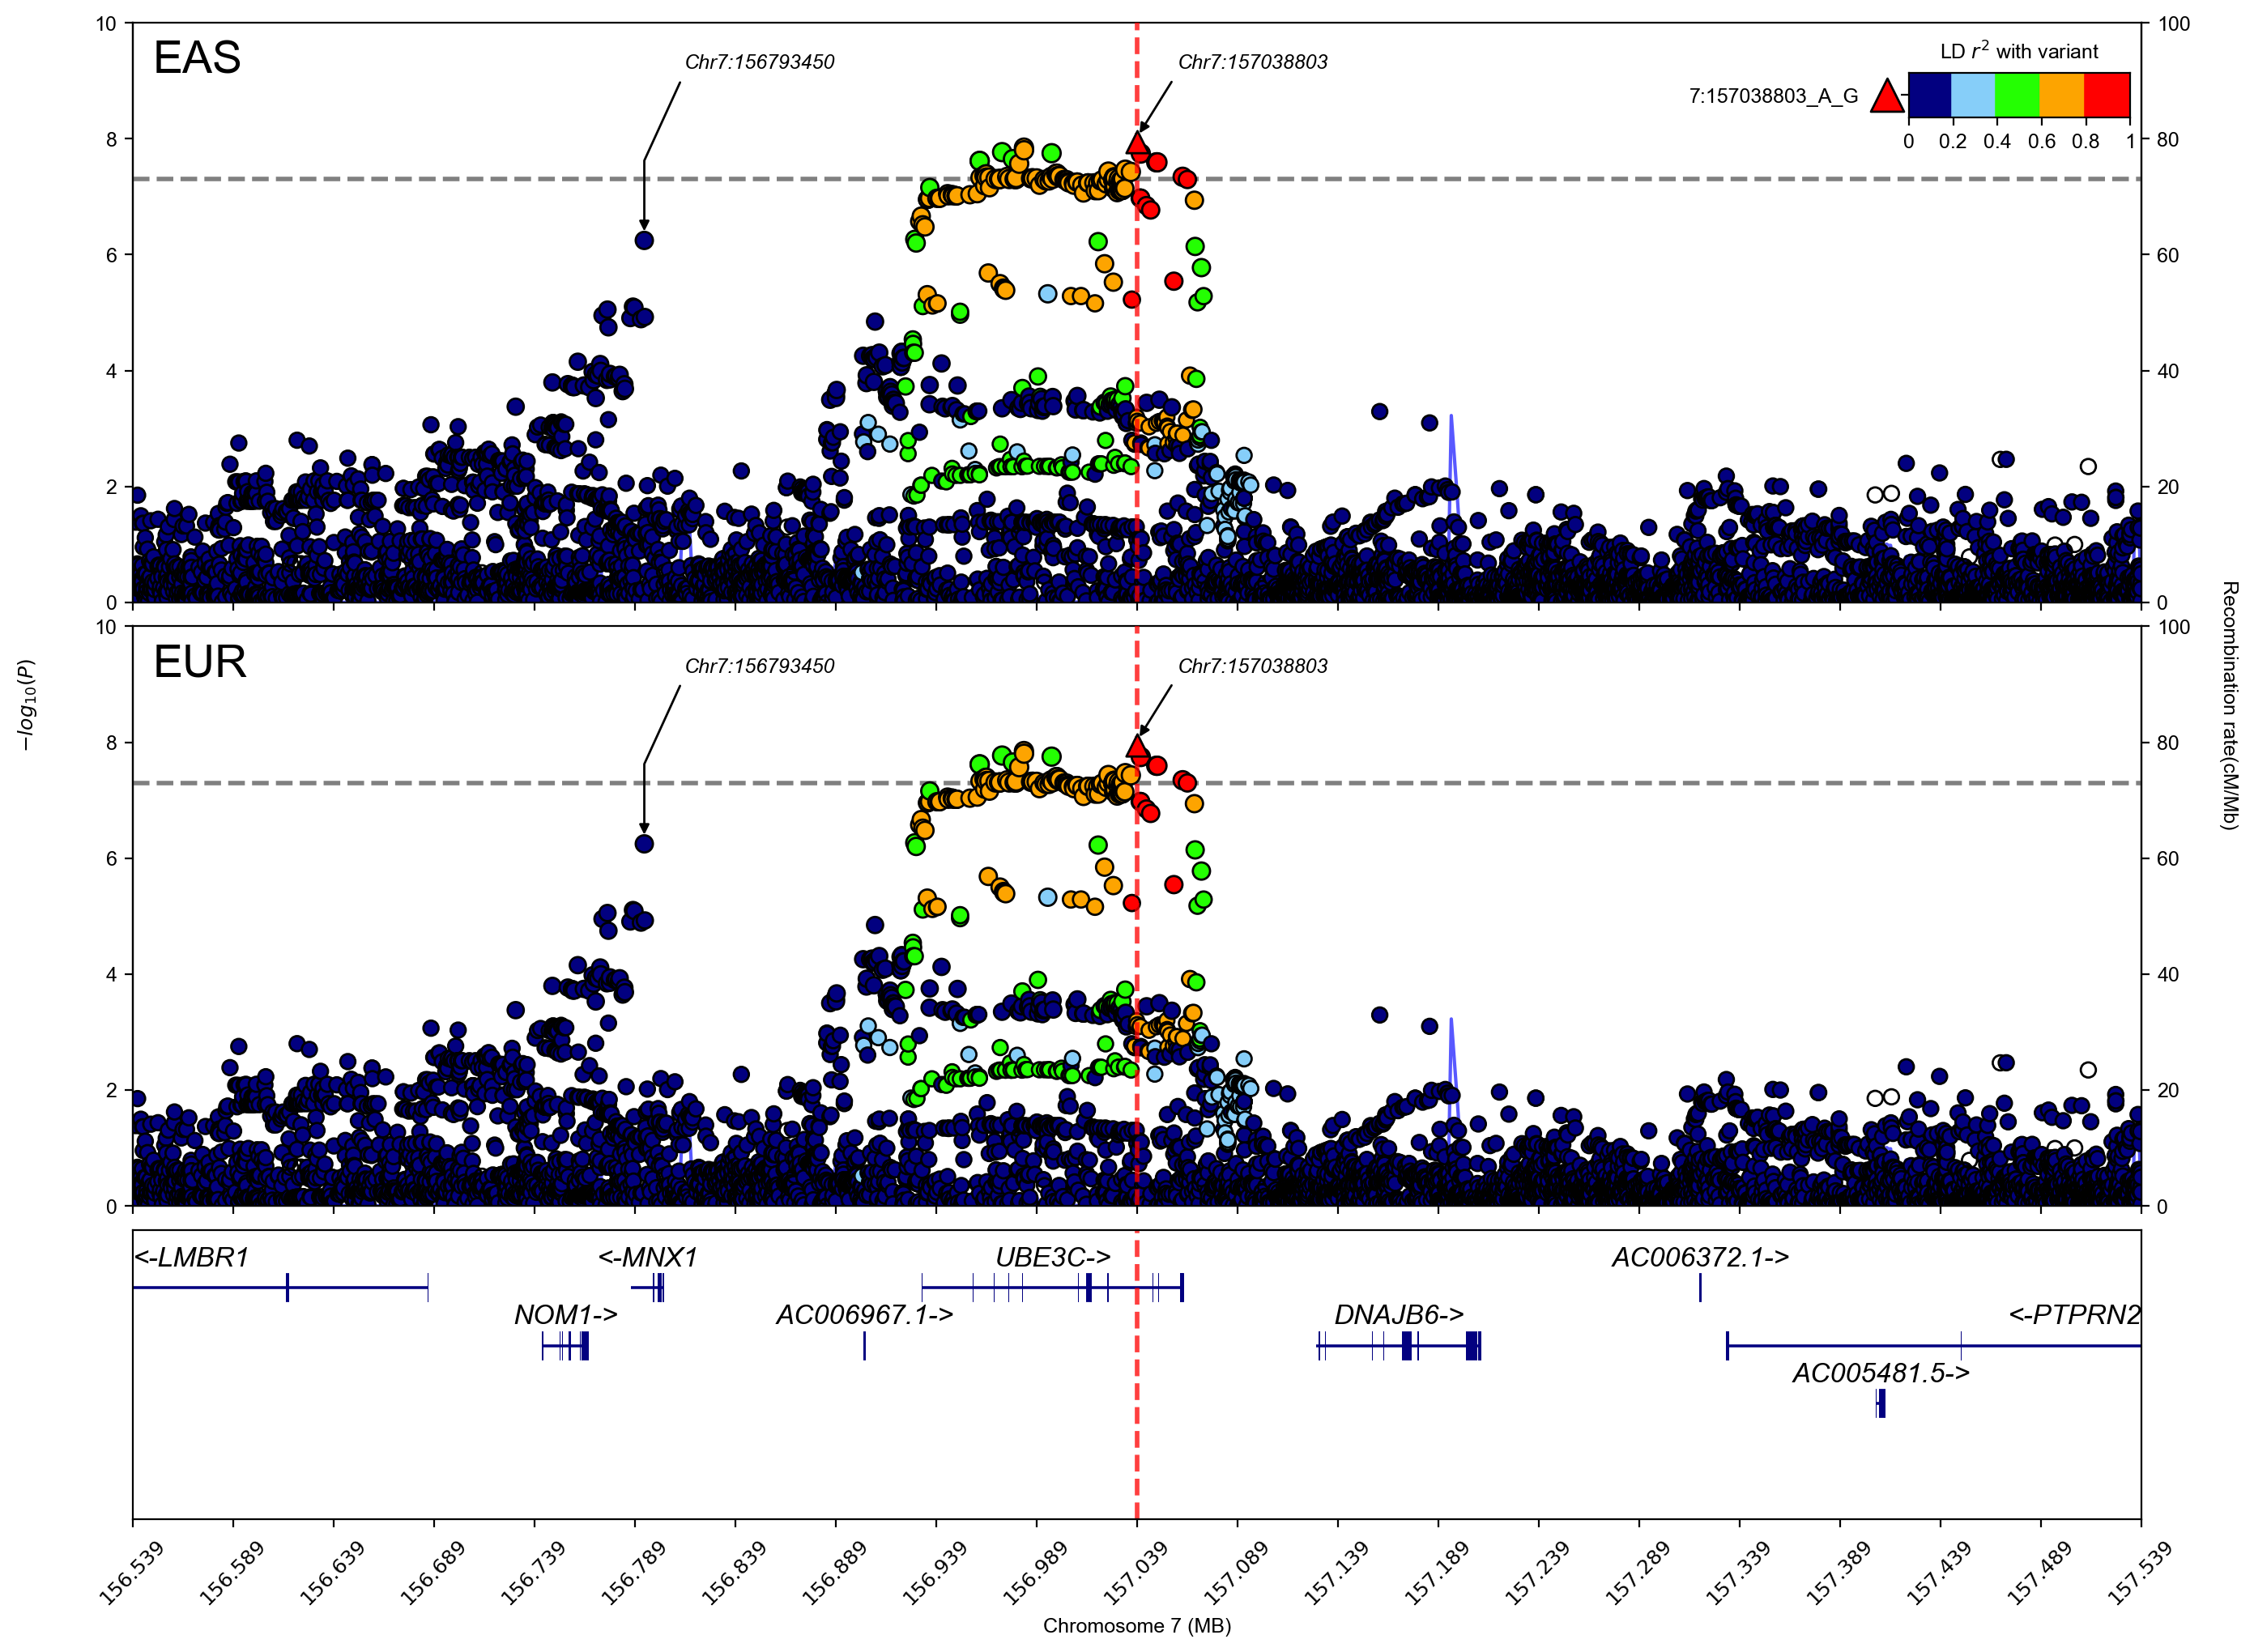

In [12]:
gl.plot_stacked_mqq(objects=[mysumstats,mysumstats],
                    vcfs=[gl.get_path("1kg_eas_hg19"),gl.get_path("1kg_eas_hg19")],
                    region=(7,156538803,157538803), 
                    mode="r",
                    build="19",
                    anno=True,
                    anno_style="right",anno_xshift=0.02,
                    anno_set=["7:156793450_G_GA","7:157038803_A_G"],
                    titles=["EAS","EUR"],
                    title_args={"size":20},
                    anno_args={"rotation":0})